This notebook outputs graphs that are useful to get a grasp on the data used for the EPRI project.
*Important notes (08/12)*: the weather and soil_and_weather datasets have the columns Tamb and Wind exchanged. Degradation_rate_per_yr will soon change in format.

# SUMMARY

#### 1. Observing distribution of features/labels
**Power -- POA -- Tamb -- Wind -- Degradation_rate_per_yr -- Soiling**
#### 2. Representation of time-evolving data: basic
**Power -- POA -- Temperature**
#### 3. Representation of time-evolving data: soil
**Power -- Soiling -- Anomalies**
#### 4. Representation of time-evolving data: weather
**Power -- POA -- Temperature -- Wind**
#### 5. Representation of time-evolving data: soil_and_weather
**Power -- Anomalies**
#### 6. "Useless" power within datasets

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib
import numpy as np

### 1. Observing distributions of features/labels

In [55]:
# To be modified depending on the dataset you want to check
# 0 for basic, 1 for soil, 2 for weather, 3 for soil and weather
dataset_index = 3

In [56]:
dataset_files_prefix = [
    "synthetic_basic/Synthetic_Basic_",
    "synthetic_soil/Synthetic_Soil_",
    "synthetic_weather/Synthetic_Weather_",
    "synthetic_soil_and_weather/Synthetic_Soil_and_Weather_"
]

dataset_label = [
    "basic",
    "soil",
    "weather",
    "soil and weather"
]

power_min = []
power_max = []
power_mean = []
power_std = []
POA_mean = []
POA_std = []
POA_min = []
POA_max = []
Tamb_min = []
Tamb_max = []
Tamb_mean = []
Tamb_std = []
Wind_min = []
Wind_max = []
Wind_mean = []
Wind_std = []
soil_min = []
soil_max = []
soil_mean = []
soil_std = []

for i in range(0, 50):
    print("Checking df #"+str(i))
    df = pd.read_csv("./data/raw/"+dataset_files_prefix[dataset_index]+str(i)+".csv")
    power_min.append(df.Power.min())
    power_max.append(df.Power.max())
    power_mean.append(df.Power.mean())
    power_std.append(df.Power.std())
    POA_min.append(df.POA.min())
    POA_max.append(df.POA.max())
    POA_mean.append(df.POA.mean())
    POA_std.append(df.POA.std())
    Tamb_min.append(df.Tamb.min())
    Tamb_max.append(df.Tamb.max())
    Tamb_mean.append(df.Tamb.mean())
    Tamb_std.append(df.Tamb.std())
    Wind_min.append(df.Wind.min())
    Wind_max.append(df.Wind.max())
    Wind_mean.append(df.Wind.mean())
    Wind_std.append(df.Wind.std())
    soil_min.append(df.soiling.min())
    soil_max.append(df.soiling.max())
    soil_mean.append(df.soiling.mean())
    soil_std.append(df.soiling.std())


Checking df #0
Checking df #1
Checking df #2
Checking df #3
Checking df #4
Checking df #5
Checking df #6
Checking df #7
Checking df #8
Checking df #9
Checking df #10
Checking df #11
Checking df #12
Checking df #13
Checking df #14
Checking df #15
Checking df #16
Checking df #17
Checking df #18
Checking df #19
Checking df #20
Checking df #21
Checking df #22
Checking df #23
Checking df #24
Checking df #25
Checking df #26
Checking df #27
Checking df #28
Checking df #29
Checking df #30
Checking df #31
Checking df #32
Checking df #33
Checking df #34
Checking df #35
Checking df #36
Checking df #37
Checking df #38
Checking df #39
Checking df #40
Checking df #41
Checking df #42
Checking df #43
Checking df #44
Checking df #45
Checking df #46
Checking df #47
Checking df #48
Checking df #49


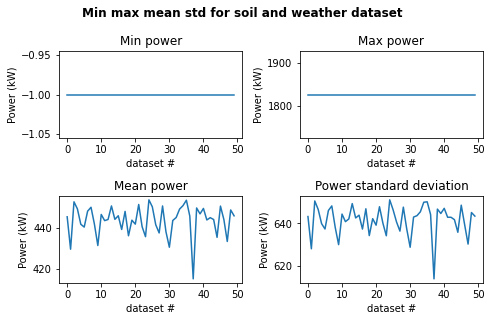

Absolute dataset min power: -1.0
Absolute dataset max power: 1827.0


In [57]:
plt.figure(figsize=(7,4.5))
plt.subplot(2,2,1)
plt.title("Min power")
plt.ylabel("Power (kW)")
plt.xlabel("dataset #")
plt.plot(power_min)
plt.subplot(2,2,2)
plt.title("Max power")
plt.ylabel("Power (kW)")
plt.xlabel("dataset #")
plt.plot(power_max)
plt.subplot(2,2,3)
plt.title("Mean power")
plt.ylabel("Power (kW)")
plt.xlabel("dataset #")
plt.plot(power_mean)
plt.subplot(2,2,4)
plt.title("Power standard deviation")
plt.ylabel("Power (kW)")
plt.xlabel("dataset #")
plt.plot(power_std)
plt.suptitle("Min max mean std for "+dataset_label[dataset_index]+" dataset",fontweight="bold")
plt.tight_layout()
plt.show()

print("Absolute dataset min power: "+str(min(power_min)))
print("Absolute dataset max power: "+str(max(power_max)))

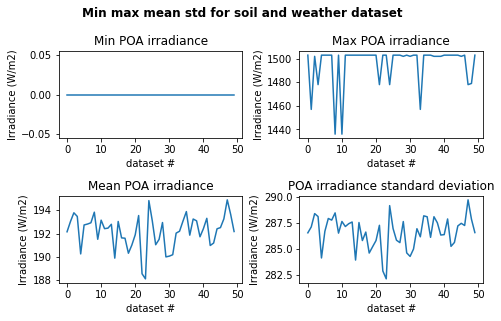

Absolute dataset min POA irradiance: 0.0
Absolute dataset max POA irradiance: 1503.0
Mean POA irradiance: 192.15340871059996
POA irradiance standard deviation: 286.52602883297095


In [58]:
plt.figure(figsize=(7,4.5))
plt.subplot(2,2,1)
plt.title("Min POA irradiance")
plt.ylabel("Irradiance (W/m2)")
plt.xlabel("dataset #")
plt.plot(POA_min)
plt.subplot(2,2,2)
plt.title("Max POA irradiance")
plt.ylabel("Irradiance (W/m2)")
plt.xlabel("dataset #")
plt.plot(POA_max)
plt.subplot(2,2,3)
plt.title("Mean POA irradiance")
plt.ylabel("Irradiance (W/m2)")
plt.xlabel("dataset #")
plt.plot(POA_mean)
plt.subplot(2,2,4)
plt.title("POA irradiance standard deviation")
plt.ylabel("Irradiance (W/m2)")
plt.xlabel("dataset #")
plt.plot(POA_std)
plt.suptitle("Min max mean std for "+dataset_label[dataset_index]+" dataset",fontweight="bold")
plt.tight_layout()
plt.show()

print("Absolute dataset min POA irradiance: "+str(min(POA_min)))
print("Absolute dataset max POA irradiance: "+str(max(POA_max)))

# For constant values:
print("Mean POA irradiance: "+str(POA_mean[0]))
print("POA irradiance standard deviation: "+str(POA_std[0]))

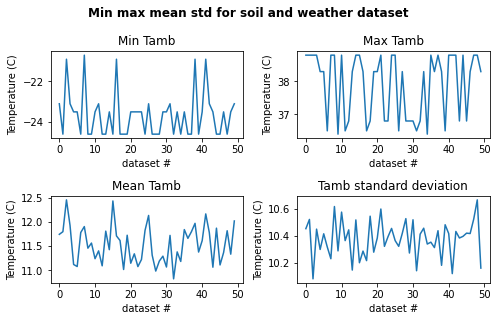

Absolute dataset min Tamb: 0.0
Absolute dataset max Tamb: 77.6
Mean Tamb: 3.5008567223439186
Tamb standard deviation: 2.6875763277075317


In [59]:
# To correct afterward; for now, assumming the columns wind and time have been switched

plt.figure(figsize=(7,4.5))
plt.subplot(2,2,1)
plt.title("Min Tamb")
plt.ylabel("Temperature (C)")
plt.xlabel("dataset #")
plt.plot(Wind_min)
plt.subplot(2,2,2)
plt.title("Max Tamb")
plt.ylabel("Temperature (C)")
plt.xlabel("dataset #")
plt.plot(Wind_max)
plt.subplot(2,2,3)
plt.title("Mean Tamb")
plt.ylabel("Temperature (C)")
plt.xlabel("dataset #")
plt.plot(Wind_mean)
plt.subplot(2,2,4)
plt.title("Tamb standard deviation")
plt.ylabel("Temperature (C)")
plt.xlabel("dataset #")
plt.plot(Wind_std)
plt.suptitle("Min max mean std for "+dataset_label[dataset_index]+" dataset",fontweight="bold")
plt.tight_layout()
plt.show()

print("Absolute dataset min Tamb: "+str(min(Tamb_min)))
print("Absolute dataset max Tamb: "+str(max(Tamb_max)))

# For constant values:
print("Mean Tamb: "+str(Tamb_mean[0]))
print("Tamb standard deviation: "+str(Tamb_std[0]))

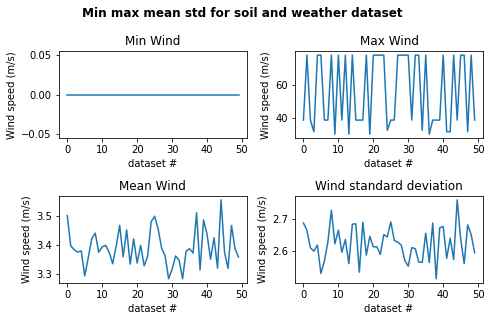

Absolute dataset min Wind: -24.6
Absolute dataset max Wind: 38.8
Mean Wind: 11.745267661555305
Wind standard deviation: 10.454562251142658


In [60]:
# To correct afterward; for now, assumming the columns wind and time have been switched

plt.figure(figsize=(7,4.5))
plt.subplot(2,2,1)
plt.title("Min Wind")
plt.ylabel("Wind speed (m/s)")
plt.xlabel("dataset #")
plt.plot(Tamb_min)
plt.subplot(2,2,2)
plt.title("Max Wind")
plt.ylabel("Wind speed (m/s)")
plt.xlabel("dataset #")
plt.plot(Tamb_max)
plt.subplot(2,2,3)
plt.title("Mean Wind")
plt.ylabel("Wind speed (m/s)")
plt.xlabel("dataset #")
plt.plot(Tamb_mean)
plt.subplot(2,2,4)
plt.title("Wind standard deviation")
plt.ylabel("Wind speed (m/s)")
plt.xlabel("dataset #")
plt.plot(Tamb_std)
plt.suptitle("Min max mean std for "+dataset_label[dataset_index]+" dataset",fontweight="bold")
plt.tight_layout()
plt.show()

print("Absolute dataset min Wind: "+str(min(Wind_min)))
print("Absolute dataset max Wind: "+str(max(Wind_max)))

# For constant values:
print("Mean Wind: "+str(Wind_mean[0]))
print("Wind standard deviation: "+str(Wind_std[0]))

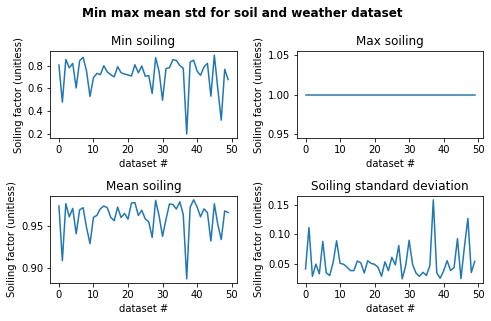

Absolute dataset min soiling: 0.19910999999999998
Absolute dataset max soiling: 1.0
Mean soiling: 0.9733957200886877
Soiling standard deviation: 0.04162002888544484


In [61]:
plt.figure(figsize=(7,4.5))
plt.subplot(2,2,1)
plt.title("Min soiling")
plt.ylabel("Soiling factor (unitless)")
plt.xlabel("dataset #")
plt.plot(soil_min)
plt.subplot(2,2,2)
plt.title("Max soiling")
plt.ylabel("Soiling factor (unitless)")
plt.xlabel("dataset #")
plt.plot(soil_max)
plt.subplot(2,2,3)
plt.title("Mean soiling")
plt.ylabel("Soiling factor (unitless)")
plt.xlabel("dataset #")
plt.plot(soil_mean)
plt.subplot(2,2,4)
plt.title("Soiling standard deviation")
plt.ylabel("Soiling factor (unitless)")
plt.xlabel("dataset #")
plt.plot(soil_std)
plt.suptitle("Min max mean std for "+dataset_label[dataset_index]+" dataset",fontweight="bold")
plt.tight_layout()
plt.show()

print("Absolute dataset min soiling: "+str(min(soil_min)))
print("Absolute dataset max soiling: "+str(max(soil_max)))

# For constant values:
print("Mean soiling: "+str(soil_mean[0]))
print("Soiling standard deviation: "+str(soil_std[0]))

Mean yearly decay rate: -0.0097652
Yearly decay rate standard deviation: 0.002697731817657196


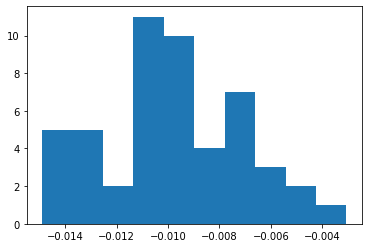

In [100]:
plt.figure()
plt.hist(ydr)

print("Mean yearly decay rate: "+str(np.mean(ydr)))
print("Yearly decay rate standard deviation: "+str(np.std(ydr)))

### 2. Representation of time-evolving data: basic

In [250]:
df = pd.read_csv("./data/raw/synthetic_basic/Synthetic_Basic_1.csv")
df["time_of_day"] = df["Unnamed: 0"].str[11:16]
df["dates"] = matplotlib.dates.date2num(df["Unnamed: 0"])

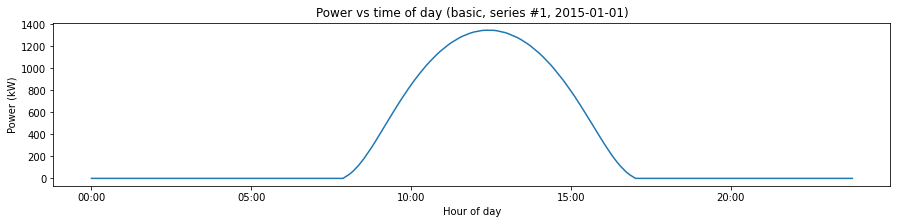

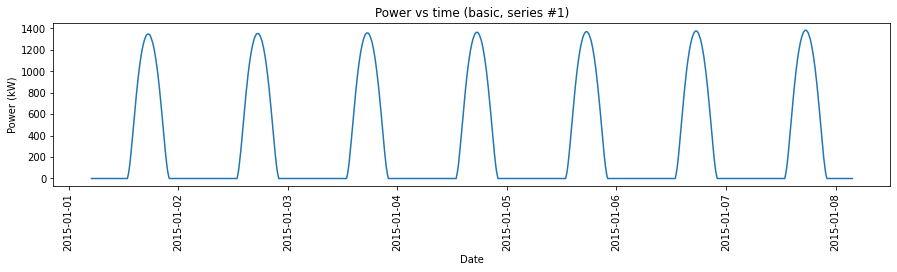

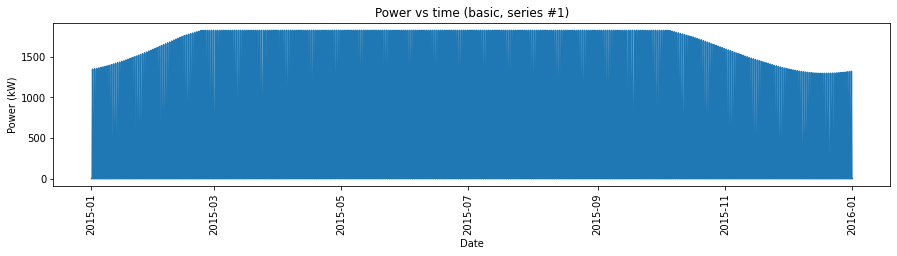

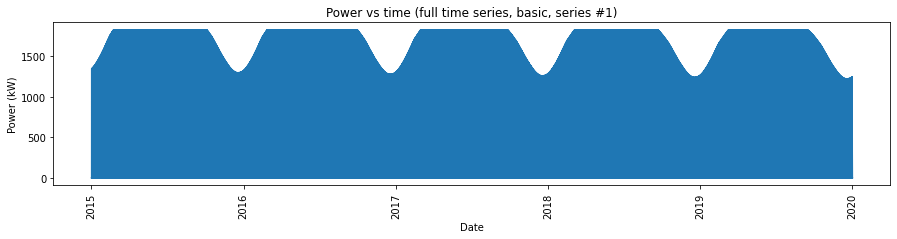

In [251]:
fig, ax = plt.subplots(figsize=(15,3))
plt.plot(df.time_of_day[:1429],df.Power[:1429], '-')
ax.xaxis.set_major_locator(plt.MaxNLocator(6))
plt.title("Power vs time of day (basic, series #1, 2015-01-01)")
plt.xlabel("Hour of day")
plt.ylabel("Power (kW)")
plt.show()

fig, ax = plt.subplots(figsize=(15,3))
plt.plot_date(df.dates[:10003],df.Power[:10003], '-')
plt.xticks(rotation='vertical')
plt.title("Power vs time (basic, series #1)")
plt.xlabel("Date")
plt.ylabel("Power (kW)")
plt.show()

fig, ax = plt.subplots(figsize=(15,3))
plt.plot_date(df.dates[:60*24*365],df.Power[:60*24*365], '-')
plt.xticks(rotation='vertical')
plt.title("Power vs time (basic, series #1)")
plt.xlabel("Date")
plt.ylabel("Power (kW)")
plt.show()

fig, ax = plt.subplots(figsize=(15,3))
plt.plot_date(dates,df.Power, '-')
plt.xticks(rotation='vertical')
plt.title("Power vs time (full time series, basic, series #1)")
plt.xlabel("Date")
plt.ylabel("Power (kW)")
plt.show()

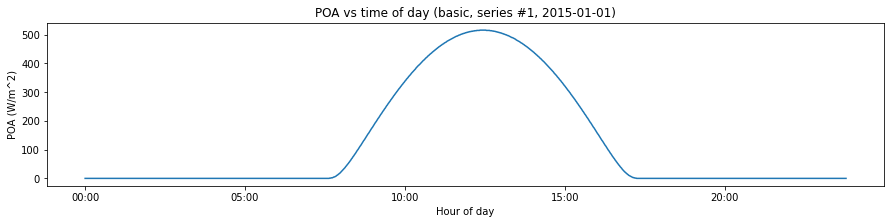

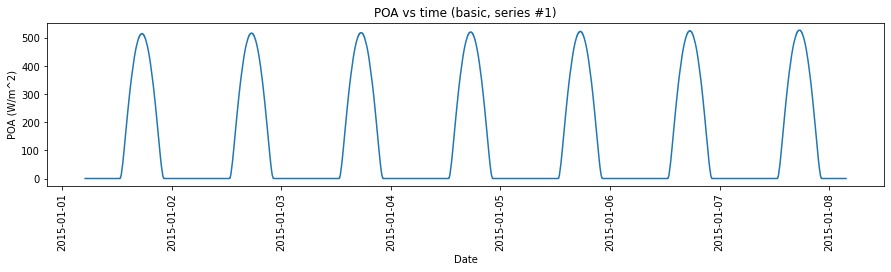

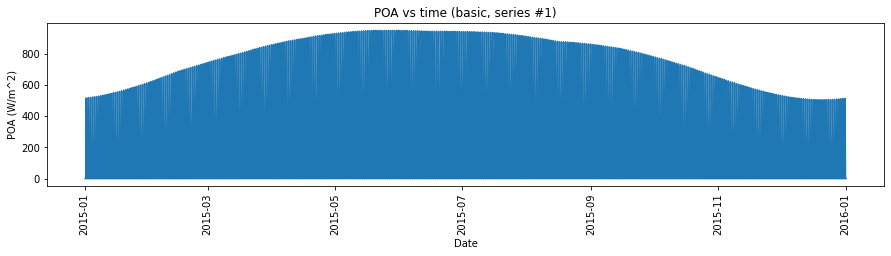

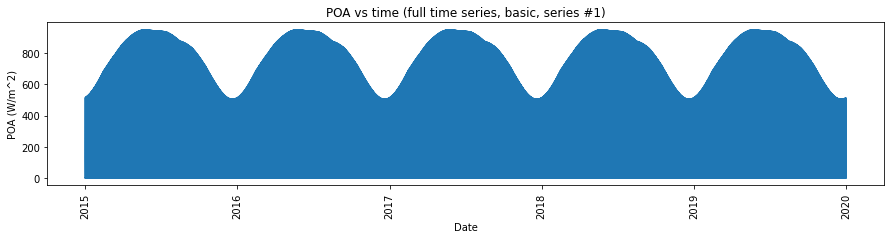

In [252]:
fig, ax = plt.subplots(figsize=(15,3))
plt.plot(df.time_of_day[:1429],df.POA[:1429], '-')
ax.xaxis.set_major_locator(plt.MaxNLocator(6))
plt.title("POA vs time of day (basic, series #1, 2015-01-01)")
plt.xlabel("Hour of day")
plt.ylabel("POA (W/m^2)")
plt.show()

fig, ax = plt.subplots(figsize=(15,3))
plt.plot_date(df.dates[:10003],df.POA[:10003], '-')
plt.xticks(rotation='vertical')
plt.title("POA vs time (basic, series #1)")
plt.xlabel("Date")
plt.ylabel("POA (W/m^2)")
plt.show()

fig, ax = plt.subplots(figsize=(15,3))
plt.plot_date(df.dates[:60*24*365],df.POA[:60*24*365], '-')
plt.xticks(rotation='vertical')
plt.title("POA vs time (basic, series #1)")
plt.xlabel("Date")
plt.ylabel("POA (W/m^2)")
plt.show()

fig, ax = plt.subplots(figsize=(15,3))
plt.plot_date(df.dates,df.POA, '-')
plt.xticks(rotation='vertical')
plt.title("POA vs time (full time series, basic, series #1)")
plt.xlabel("Date")
plt.ylabel("POA (W/m^2)")
plt.show()

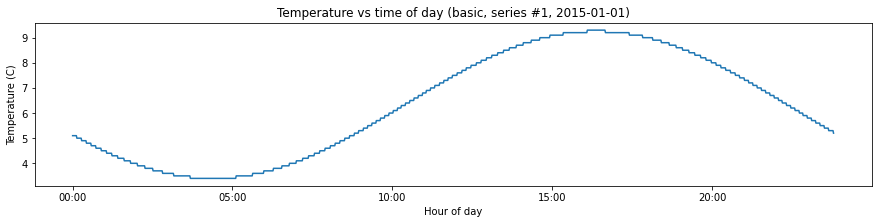

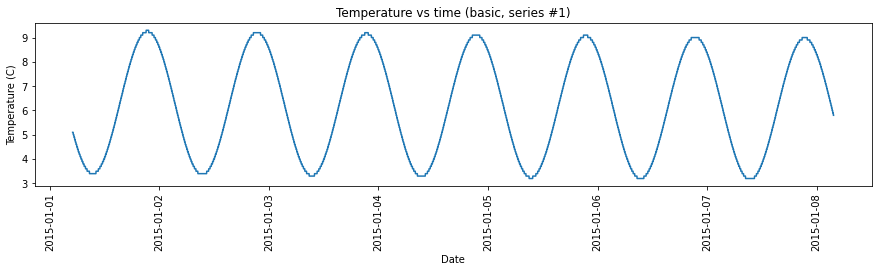

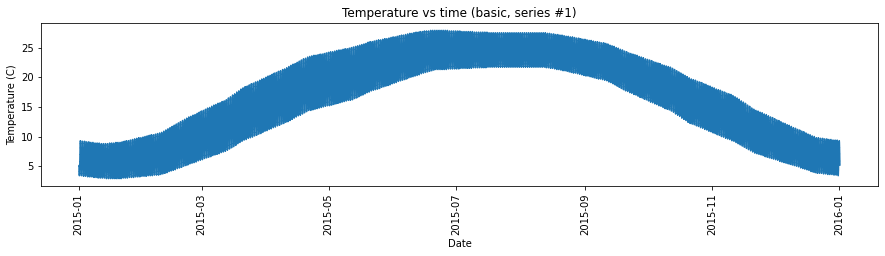

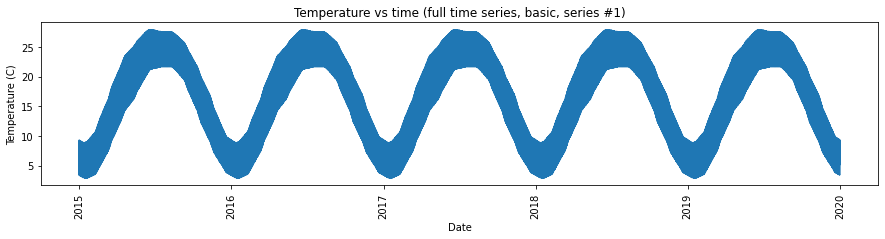

In [253]:
fig, ax = plt.subplots(figsize=(15,3))
plt.plot(df.time_of_day[:1429],df.Tamb[:1429], '-')
ax.xaxis.set_major_locator(plt.MaxNLocator(6))
plt.title("Temperature vs time of day (basic, series #1, 2015-01-01)")
plt.xlabel("Hour of day")
plt.ylabel("Temperature (C)")
plt.show()

fig, ax = plt.subplots(figsize=(15,3))
plt.plot_date(df.dates[:10003],df.Tamb[:10003], '-')
plt.xticks(rotation='vertical')
plt.title("Temperature vs time (basic, series #1)")
plt.xlabel("Date")
plt.ylabel("Temperature (C)")
plt.show()

fig, ax = plt.subplots(figsize=(15,3))
plt.plot_date(df.dates[:60*24*365],df.Tamb[:60*24*365], '-')
plt.xticks(rotation='vertical')
plt.title("Temperature vs time (basic, series #1)")
plt.xlabel("Date")
plt.ylabel("Temperature (C)")
plt.show()

fig, ax = plt.subplots(figsize=(15,3))
plt.plot_date(df.dates,df.Tamb, '-')
plt.xticks(rotation='vertical')
plt.title("Temperature vs time (full time series, basic, series #1)")
plt.xlabel("Date")
plt.ylabel("Temperature (C)")
plt.show()

### 3. Representation of time-evolving data: soil

In [20]:
df = pd.read_csv("./data/raw/synthetic_soil/Synthetic_Soil_1.csv")
df["time_of_day"] = df["Unnamed: 0"].str[11:16]
df["dates"] = matplotlib.dates.date2num(df["Unnamed: 0"])

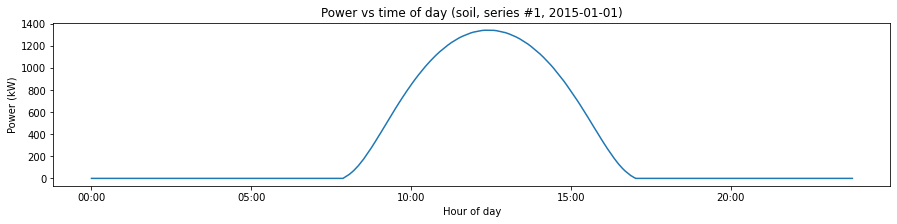

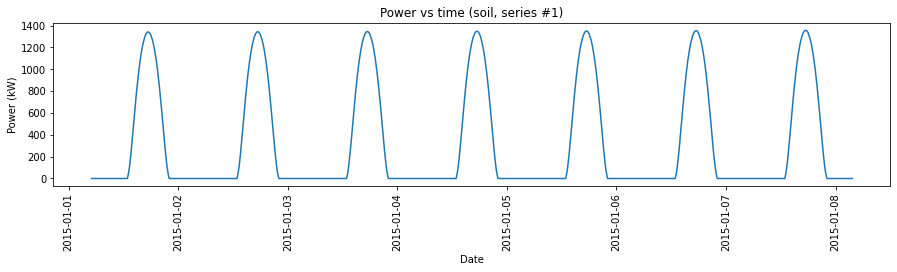

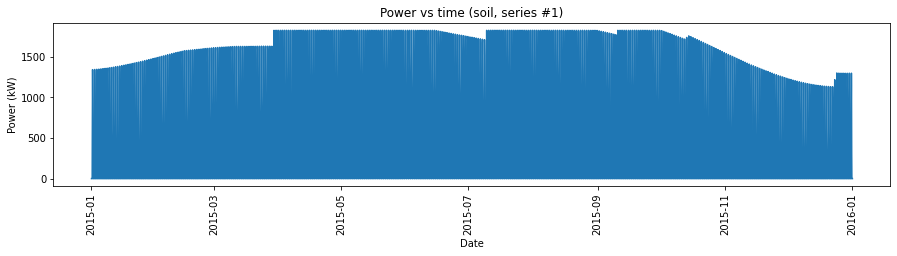

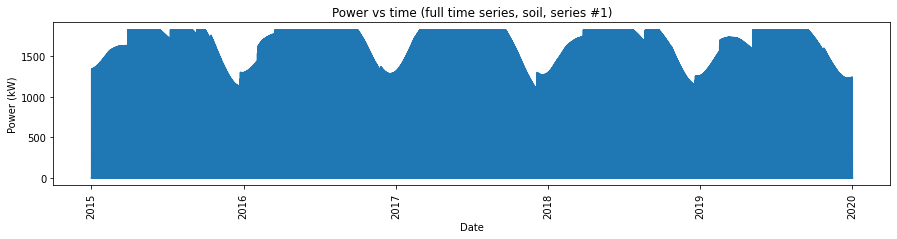

In [230]:
fig, ax = plt.subplots(figsize=(15,3))
plt.plot(df.time_of_day[:1429],df.Power[:1429], '-')
ax.xaxis.set_major_locator(plt.MaxNLocator(6))
plt.title("Power vs time of day (soil, series #1, 2015-01-01)")
plt.xlabel("Hour of day")
plt.ylabel("Power (kW)")
plt.show()

fig, ax = plt.subplots(figsize=(15,3))
plt.plot_date(df.dates[:10003],df.Power[:10003], '-')
plt.xticks(rotation='vertical')
plt.title("Power vs time (soil, series #1)")
plt.xlabel("Date")
plt.ylabel("Power (kW)")
plt.show()

fig, ax = plt.subplots(figsize=(15,3))
plt.plot_date(df.dates[:60*24*365],df.Power[:60*24*365], '-')
plt.xticks(rotation='vertical')
plt.title("Power vs time (soil, series #1)")
plt.xlabel("Date")
plt.ylabel("Power (kW)")
plt.show()

fig, ax = plt.subplots(figsize=(15,3))
plt.plot_date(df.dates,df.Power, '-')
plt.xticks(rotation='vertical')
plt.title("Power vs time (full time series, soil, series #1)")
plt.xlabel("Date")
plt.ylabel("Power (kW)")
plt.show()

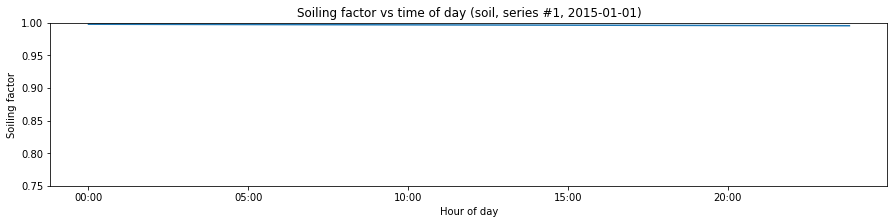

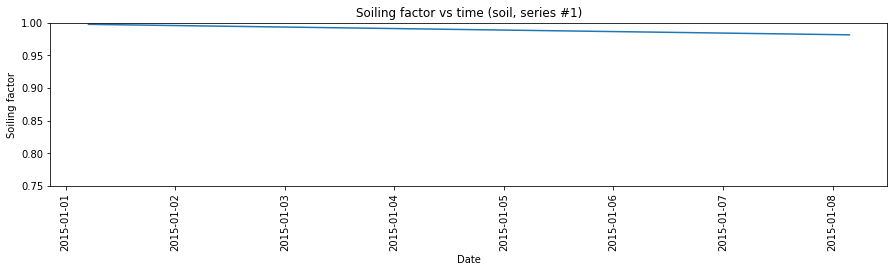

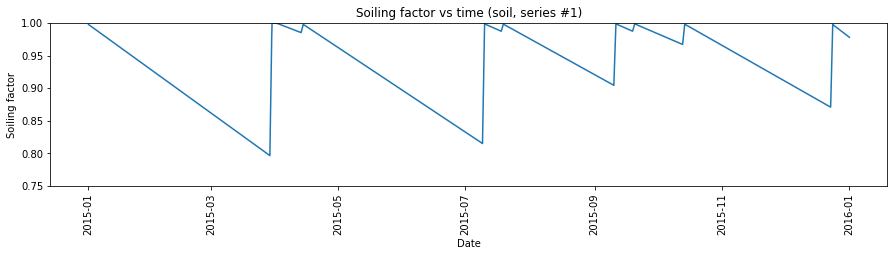

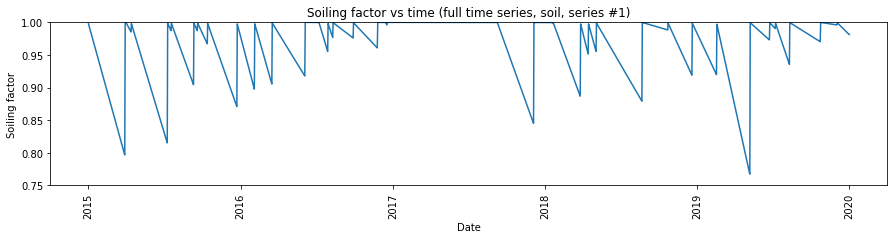

In [258]:
fig, ax = plt.subplots(figsize=(15,3))
plt.plot(df.time_of_day[:1429],df.soiling[:1429], '-')
ax.xaxis.set_major_locator(plt.MaxNLocator(6))
plt.ylim(0.75,1)
plt.title("Soiling factor vs time of day (soil, series #1, 2015-01-01)")
plt.xlabel("Hour of day")
plt.ylabel("Soiling factor")
plt.show()

fig, ax = plt.subplots(figsize=(15,3))
plt.plot_date(df.dates[:10003],df.soiling[:10003], '-')
plt.xticks(rotation='vertical')
plt.ylim(0.75,1)
plt.title("Soiling factor vs time (soil, series #1)")
plt.xlabel("Date")
plt.ylabel("Soiling factor")
plt.show()

fig, ax = plt.subplots(figsize=(15,3))
plt.plot_date(df.dates[:60*24*365],df.soiling[:60*24*365], '-')
plt.xticks(rotation='vertical')
plt.ylim(0.75,1)
plt.title("Soiling factor vs time (soil, series #1)")
plt.xlabel("Date")
plt.ylabel("Soiling factor")
plt.show()

fig, ax = plt.subplots(figsize=(15,3))
plt.plot_date(df.dates,df.soiling, '-')
plt.xticks(rotation='vertical')
plt.ylim(0.75,1)
plt.title("Soiling factor vs time (full time series, soil, series #1)")
plt.xlabel("Date")
plt.ylabel("Soiling factor")
plt.show()

**Anomalies:**

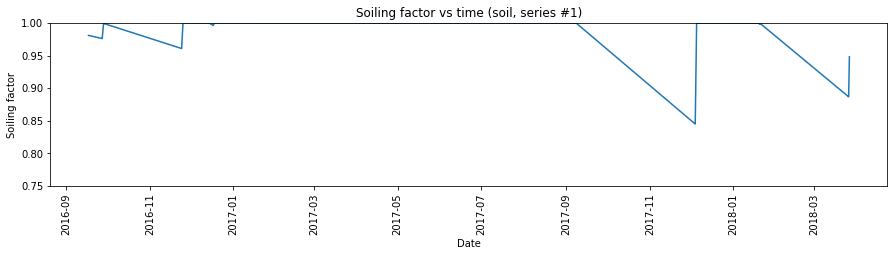

In [34]:
fig, ax = plt.subplots(figsize=(15,3))
plt.plot_date(df.dates[900000:1700000],df.soiling[900000:1700000], '-')
plt.xticks(rotation='vertical')
plt.ylim(0.75,1)
plt.title("Soiling factor vs time (soil, series #1)")
plt.xlabel("Date")
plt.ylabel("Soiling factor")
plt.show()

### 4. Representation of time-evolving data: weather

In [259]:
df = pd.read_csv("./data/raw/synthetic_weather/Synthetic_Weather_1.csv")
df["time_of_day"] = df["Unnamed: 0"].str[11:16]
df["dates"] = matplotlib.dates.date2num(df["Unnamed: 0"])

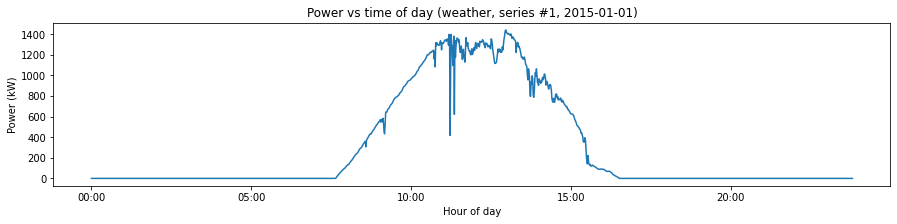

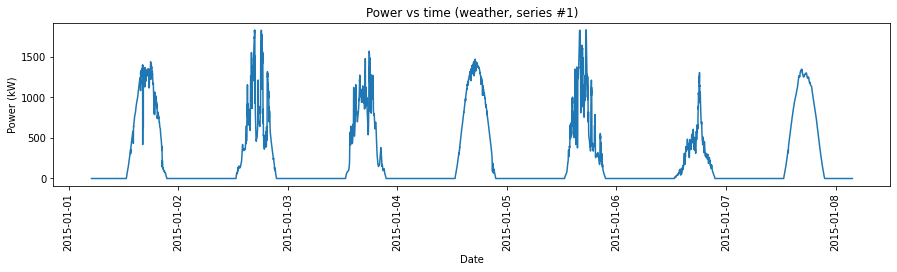

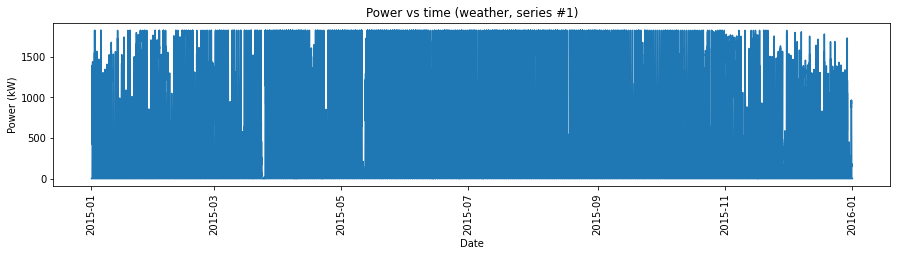

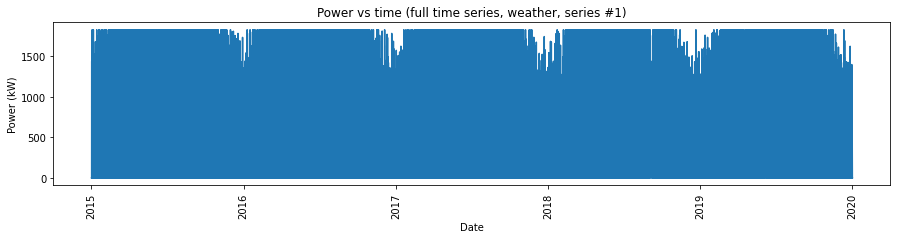

In [235]:
fig, ax = plt.subplots(figsize=(15,3))
plt.plot(df.time_of_day[:1429],df.Power[:1429], '-')
ax.xaxis.set_major_locator(plt.MaxNLocator(6))
plt.title("Power vs time of day (weather, series #1, 2015-01-01)")
plt.xlabel("Hour of day")
plt.ylabel("Power (kW)")
plt.show()

fig, ax = plt.subplots(figsize=(15,3))
plt.plot_date(df.dates[:10003],df.Power[:10003], '-')
plt.xticks(rotation='vertical')
plt.title("Power vs time (weather, series #1)")
plt.xlabel("Date")
plt.ylabel("Power (kW)")
plt.show()

fig, ax = plt.subplots(figsize=(15,3))
plt.plot_date(df.dates[:60*24*365],df.Power[:60*24*365], '-')
plt.xticks(rotation='vertical')
plt.title("Power vs time (weather, series #1)")
plt.xlabel("Date")
plt.ylabel("Power (kW)")
plt.show()

fig, ax = plt.subplots(figsize=(15,3))
plt.plot_date(df.dates,df.Power, '-')
plt.xticks(rotation='vertical')
plt.title("Power vs time (full time series, weather, series #1)")
plt.xlabel("Date")
plt.ylabel("Power (kW)")
plt.show()

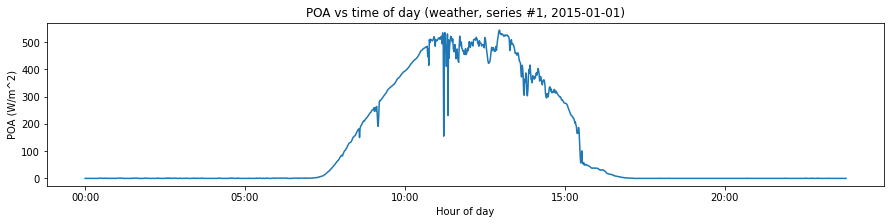

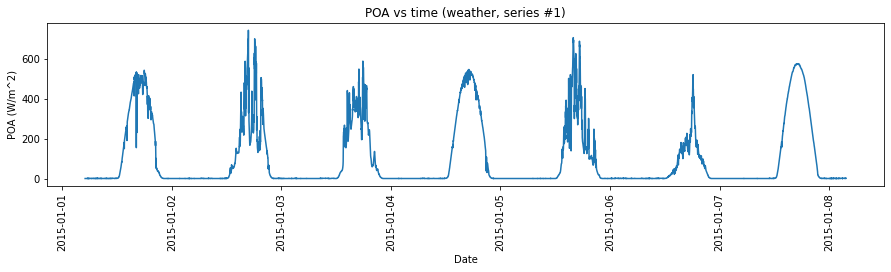

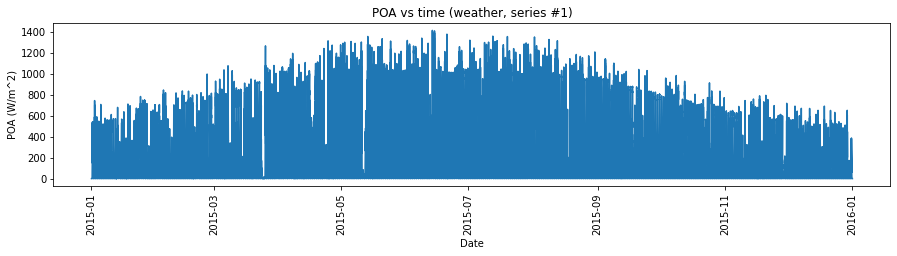

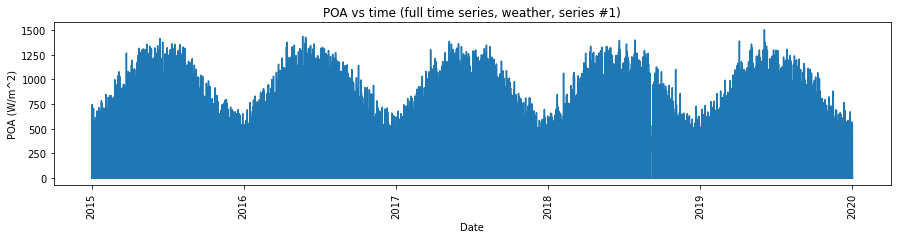

In [237]:
fig, ax = plt.subplots(figsize=(15,3))
plt.plot(df.time_of_day[:1429],df.POA[:1429], '-')
ax.xaxis.set_major_locator(plt.MaxNLocator(6))
plt.title("POA vs time of day (weather, series #1, 2015-01-01)")
plt.xlabel("Hour of day")
plt.ylabel("POA (W/m^2)")
plt.show()

fig, ax = plt.subplots(figsize=(15,3))
plt.plot_date(df.dates[:10003],df.POA[:10003], '-')
plt.xticks(rotation='vertical')
plt.title("POA vs time (weather, series #1)")
plt.xlabel("Date")
plt.ylabel("POA (W/m^2)")
plt.show()

fig, ax = plt.subplots(figsize=(15,3))
plt.plot_date(df.dates[:60*24*365],df.POA[:60*24*365], '-')
plt.xticks(rotation='vertical')
plt.title("POA vs time (weather, series #1)")
plt.xlabel("Date")
plt.ylabel("POA (W/m^2)")
plt.show()

fig, ax = plt.subplots(figsize=(15,3))
plt.plot_date(df.dates,df.POA, '-')
plt.xticks(rotation='vertical')
plt.title("POA vs time (full time series, weather, series #1)")
plt.xlabel("Date")
plt.ylabel("POA (W/m^2)")
plt.show()

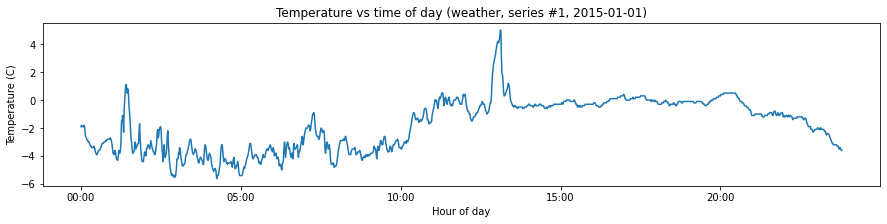

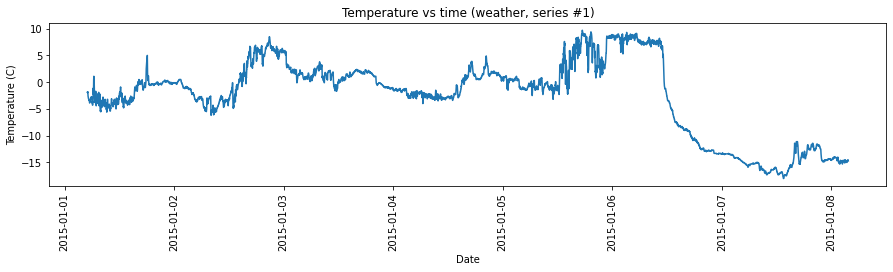

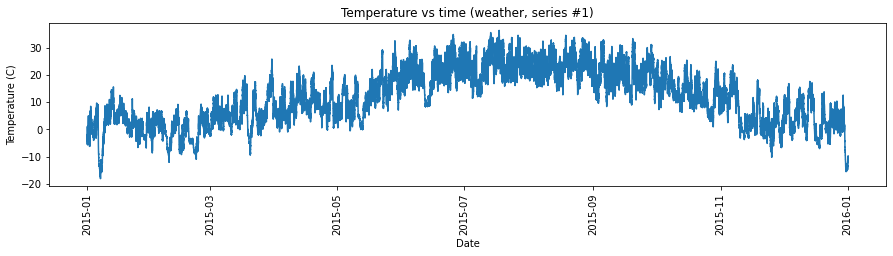

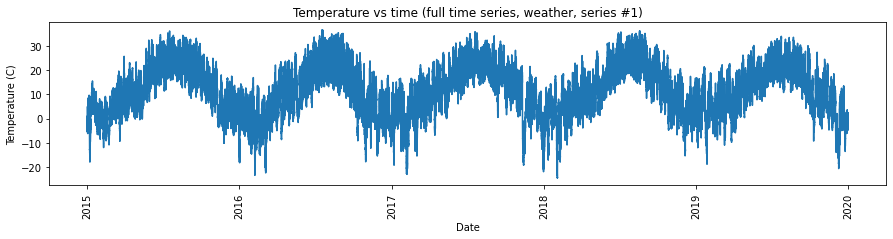

In [260]:
fig, ax = plt.subplots(figsize=(15,3))
plt.plot(df.time_of_day[:1429],df.Wind[:1429], '-')
ax.xaxis.set_major_locator(plt.MaxNLocator(6))
plt.title("Temperature vs time of day (weather, series #1, 2015-01-01)")
plt.xlabel("Hour of day")
plt.ylabel("Temperature (C)")
plt.show()

fig, ax = plt.subplots(figsize=(15,3))
plt.plot_date(df.dates[:10003],df.Wind[:10003], '-')
plt.xticks(rotation='vertical')
plt.title("Temperature vs time (weather, series #1)")
plt.xlabel("Date")
plt.ylabel("Temperature (C)")
plt.show()

fig, ax = plt.subplots(figsize=(15,3))
plt.plot_date(df.dates[:60*24*365],df.Wind[:60*24*365], '-')
plt.xticks(rotation='vertical')
plt.title("Temperature vs time (weather, series #1)")
plt.xlabel("Date")
plt.ylabel("Temperature (C)")
plt.show()

fig, ax = plt.subplots(figsize=(15,3))
plt.plot_date(df.dates,df.Wind, '-')
plt.xticks(rotation='vertical')
plt.title("Temperature vs time (full time series, weather, series #1)")
plt.xlabel("Date")
plt.ylabel("Temperature (C)")
plt.show()

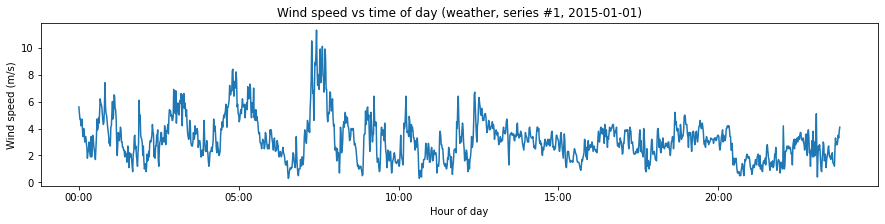

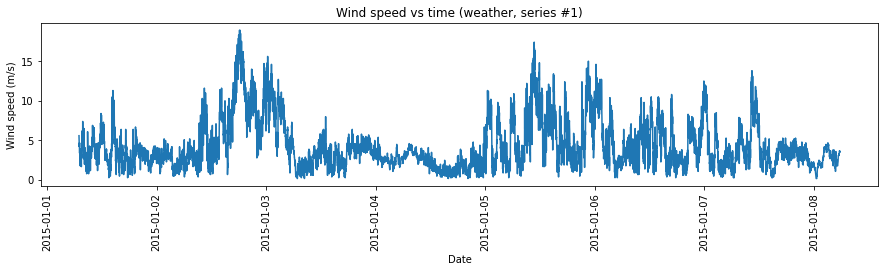

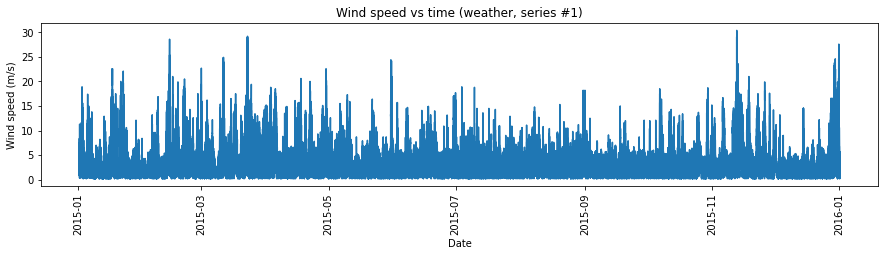

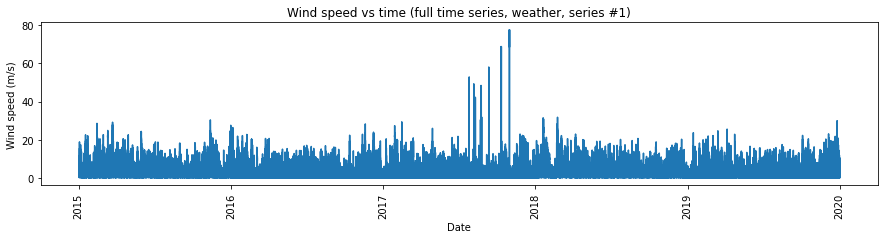

In [36]:
fig, ax = plt.subplots(figsize=(15,3))
plt.plot(df.time_of_day[:1429],df.Tamb[:1429], '-')
ax.xaxis.set_major_locator(plt.MaxNLocator(6))
plt.title("Wind speed vs time of day (weather, series #1, 2015-01-01)")
plt.xlabel("Hour of day")
plt.ylabel("Wind speed (m/s)")
plt.show()

fig, ax = plt.subplots(figsize=(15,3))
plt.plot_date(df.dates[:10003],df.Tamb[:10003], '-')
plt.xticks(rotation='vertical')
plt.title("Wind speed vs time (weather, series #1)")
plt.xlabel("Date")
plt.ylabel("Wind speed (m/s)")
plt.show()

fig, ax = plt.subplots(figsize=(15,3))
plt.plot_date(df.dates[:60*24*365],df.Tamb[:60*24*365], '-')
plt.xticks(rotation='vertical')
plt.title("Wind speed vs time (weather, series #1)")
plt.xlabel("Date")
plt.ylabel("Wind speed (m/s)")
plt.show()

fig, ax = plt.subplots(figsize=(15,3))
plt.plot_date(df.dates,df.Tamb, '-')
plt.xticks(rotation='vertical')
plt.title("Wind speed vs time (full time series, weather, series #1)")
plt.xlabel("Date")
plt.ylabel("Wind speed (m/s)")
plt.show()

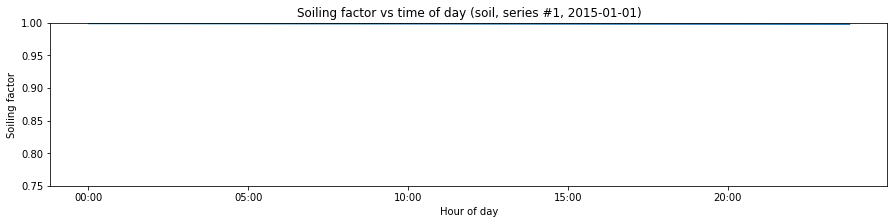

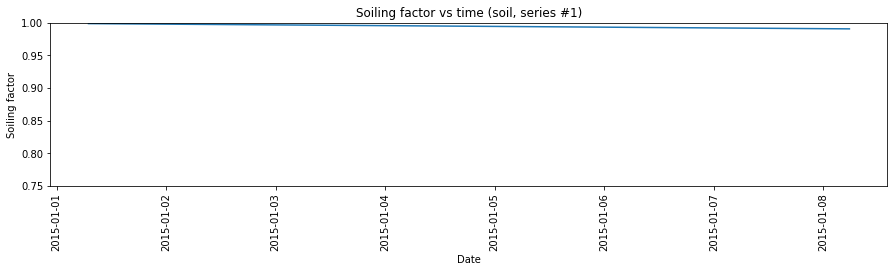

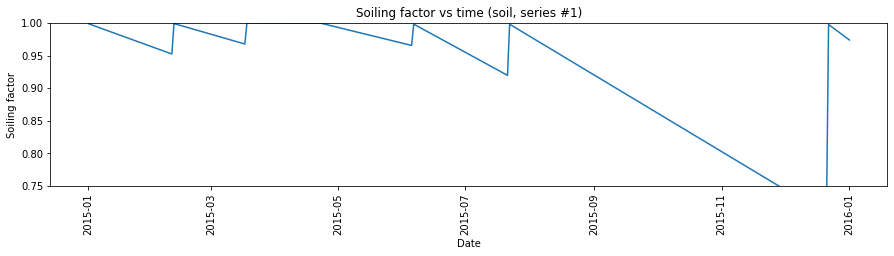

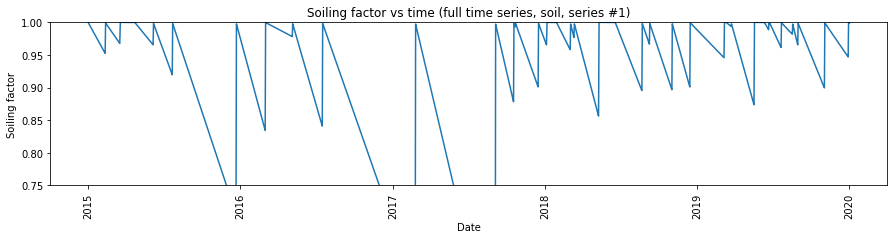

In [38]:
fig, ax = plt.subplots(figsize=(15,3))
plt.plot(df.time_of_day[:1429],df.soiling[:1429], '-')
ax.xaxis.set_major_locator(plt.MaxNLocator(6))
plt.ylim(0.75,1)
plt.title("Soiling factor vs time of day (soil, series #1, 2015-01-01)")
plt.xlabel("Hour of day")
plt.ylabel("Soiling factor")
plt.show()

fig, ax = plt.subplots(figsize=(15,3))
plt.plot_date(df.dates[:10003],df.soiling[:10003], '-')
plt.xticks(rotation='vertical')
plt.ylim(0.75,1)
plt.title("Soiling factor vs time (soil, series #1)")
plt.xlabel("Date")
plt.ylabel("Soiling factor")
plt.show()

fig, ax = plt.subplots(figsize=(15,3))
plt.plot_date(df.dates[:60*24*365],df.soiling[:60*24*365], '-')
plt.xticks(rotation='vertical')
plt.ylim(0.75,1)
plt.title("Soiling factor vs time (soil, series #1)")
plt.xlabel("Date")
plt.ylabel("Soiling factor")
plt.show()

fig, ax = plt.subplots(figsize=(15,3))
plt.plot_date(df.dates,df.soiling, '-')
plt.xticks(rotation='vertical')
plt.ylim(0.75,1)
plt.title("Soiling factor vs time (full time series, soil, series #1)")
plt.xlabel("Date")
plt.ylabel("Soiling factor")
plt.show()

### 5. Representation of time-evolving data: soil and weather

In [35]:
df = pd.read_csv("./data/raw/synthetic_soil_and_weather/Synthetic_Soil_and_Weather_1.csv")
df["time_of_day"] = df["Unnamed: 0"].str[11:16]
df["dates"] = matplotlib.dates.date2num(df["Unnamed: 0"])

In [4]:
df.head()

,Unnamed: 0,Power,POA,Tamb,Wind,Degradation_rate_per_yr,soiling,time_of_day,dates
0,2015-01-01 00:00:00-07:00,-1.0,0.0,5.6,-10.0,-0.00684,0.99884,00:00,16436.291667
1,2015-01-01 00:01:00-07:00,-1.0,0.0,5.1,-9.9,-0.00684,0.99884,00:01,16436.292361
2,2015-01-01 00:02:00-07:00,-1.0,0.0,4.7,-9.9,-0.00684,0.99884,00:02,16436.293056
3,2015-01-01 00:03:00-07:00,-1.0,0.0,4.7,-10.0,-0.00684,0.99884,00:03,16436.293750
4,2015-01-01 00:04:00-07:00,-1.0,0.0,4.2,-10.0,-0.00684,0.99884,00:04,16436.294444


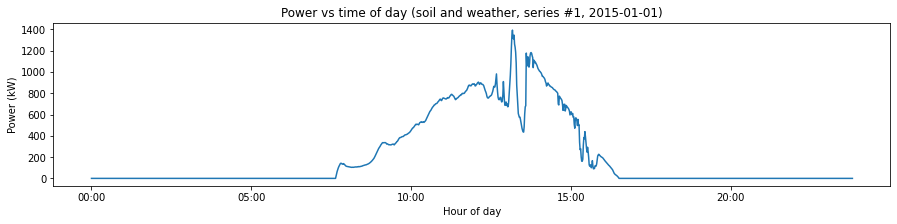

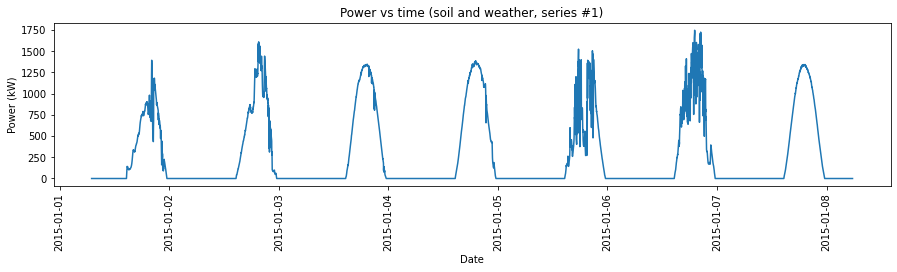

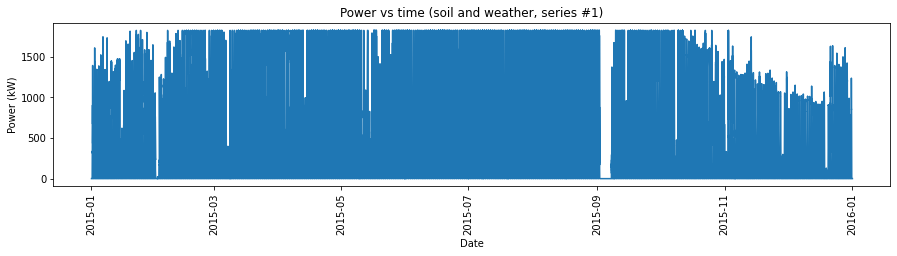

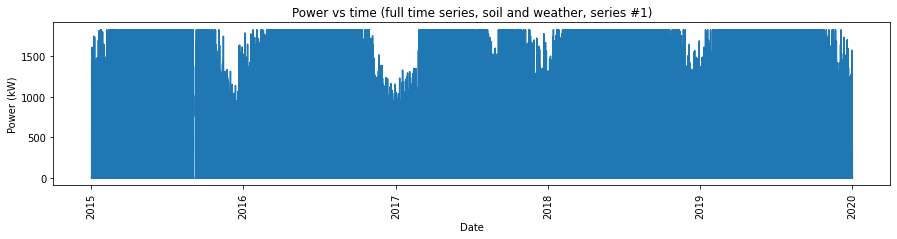

In [8]:
fig, ax = plt.subplots(figsize=(15,3))
plt.plot(df.time_of_day[:1429],df.Power[:1429], '-')
ax.xaxis.set_major_locator(plt.MaxNLocator(6))
plt.title("Power vs time of day (soil and weather, series #1, 2015-01-01)")
plt.xlabel("Hour of day")
plt.ylabel("Power (kW)")
plt.show()

fig, ax = plt.subplots(figsize=(15,3))
plt.plot_date(df.dates[:10003],df.Power[:10003], '-')
plt.xticks(rotation='vertical')
plt.title("Power vs time (soil and weather, series #1)")
plt.xlabel("Date")
plt.ylabel("Power (kW)")
plt.show()

fig, ax = plt.subplots(figsize=(15,3))
plt.plot_date(df.dates[:60*24*365],df.Power[:60*24*365], '-')
plt.xticks(rotation='vertical')
plt.title("Power vs time (soil and weather, series #1)")
plt.xlabel("Date")
plt.ylabel("Power (kW)")
plt.show()

fig, ax = plt.subplots(figsize=(15,3))
plt.plot_date(df.dates,df.Power, '-')
plt.xticks(rotation='vertical')
plt.title("Power vs time (full time series, soil and weather, series #1)")
plt.xlabel("Date")
plt.ylabel("Power (kW)")
plt.show()

**Anomalies**

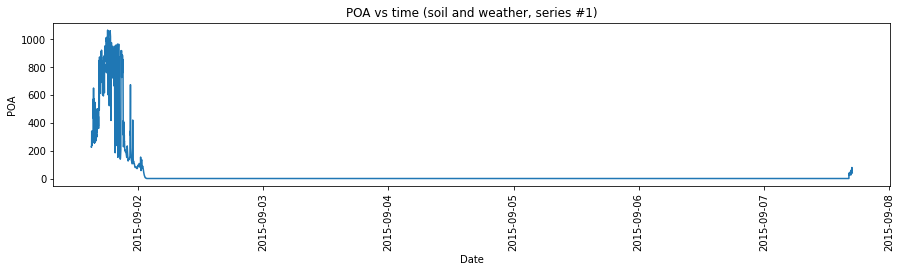

In [19]:
fig, ax = plt.subplots(figsize=(15,3))
plt.plot_date(df.dates[40*24*365:41*24*365],df.POA[40*24*365:41*24*365], '-')
plt.xticks(rotation='vertical')
plt.title("POA vs time (soil and weather, series #1)")
plt.xlabel("Date")
plt.ylabel("POA")
plt.show()

### 6. "Useless" power within datasets

Time steps with power that is minimal (at -1.0) or capped out (at 1827.0) are considered "useless" since they usually cannot decay.

In [215]:
useful_power_percentage = []
for i in range(0, 50):
    print("Checking df #"+str(i))
    df = pd.read_csv("./data/raw/synthetic_soil_and_weather/Synthetic_Soil_and_Weather_"+str(i)+".csv")
    useful_power_percentage.append(1-(len(df[df.Power == -1.0])+ len(df[df.Power == 1827.0]))/len(df))

Checking df #0
Checking df #1
Checking df #2
Checking df #3
Checking df #4
Checking df #5
Checking df #6
Checking df #7
Checking df #8
Checking df #9
Checking df #10
Checking df #11
Checking df #12
Checking df #13
Checking df #14
Checking df #15
Checking df #16
Checking df #17
Checking df #18
Checking df #19
Checking df #20
Checking df #21
Checking df #22
Checking df #23
Checking df #24
Checking df #25
Checking df #26
Checking df #27
Checking df #28
Checking df #29
Checking df #30
Checking df #31
Checking df #32
Checking df #33
Checking df #34
Checking df #35
Checking df #36
Checking df #37
Checking df #38
Checking df #39
Checking df #40
Checking df #41
Checking df #42
Checking df #43
Checking df #44
Checking df #45
Checking df #46
Checking df #47
Checking df #48
Checking df #49


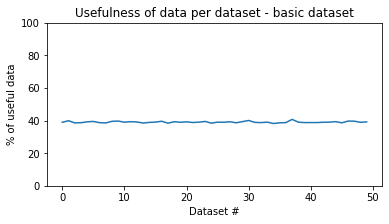

Mean percentage of useful data: 0.3916426235244006
Standard deviation of percentage of useful data: 0.004281770100908861


In [216]:
plt.figure(figsize=[6,3])
plt.xlabel("Dataset #")
plt.ylabel("% of useful data")
plt.ylim(0,100)
plt.title("Usefulness of data per dataset - basic dataset")
plt.plot([x*100 for x in useful_power_percentage])
plt.show()

print("Mean percentage of useful data: "+str(np.mean(useless_power_percentage)))
print("Standard deviation of percentage of useful data: "+str(np.std(useless_power_percentage)))